# Classification accuracy
Manual classification is the true classification. It is accuracy calculation of automated classification.

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [2]:
name_of_classified_image = 'OBIA_classification_with_DM.png'
im_classif = Image.open(name_of_classified_image)
im_classif = np.array(im_classif)
im_classif = im_classif[:,:,:3] # PNG has the 4d band "Transparency", I delete it.

im_right = Image.open('Manual_classification.png')
im_right = np.array(im_right)
im_right = im_right[:,:,:3]

print 'Shape of classified image is:', im_classif.shape
print 'Shape of the rigth image is:',im_right.shape

Shape of classified image is: (410, 488, 3)
Shape of the rigth image is: (410, 488, 3)


Shape of the rigth image is: (410, 488, 3)
Accuracy of OBIA_classification_with_DM.png = 0.89549


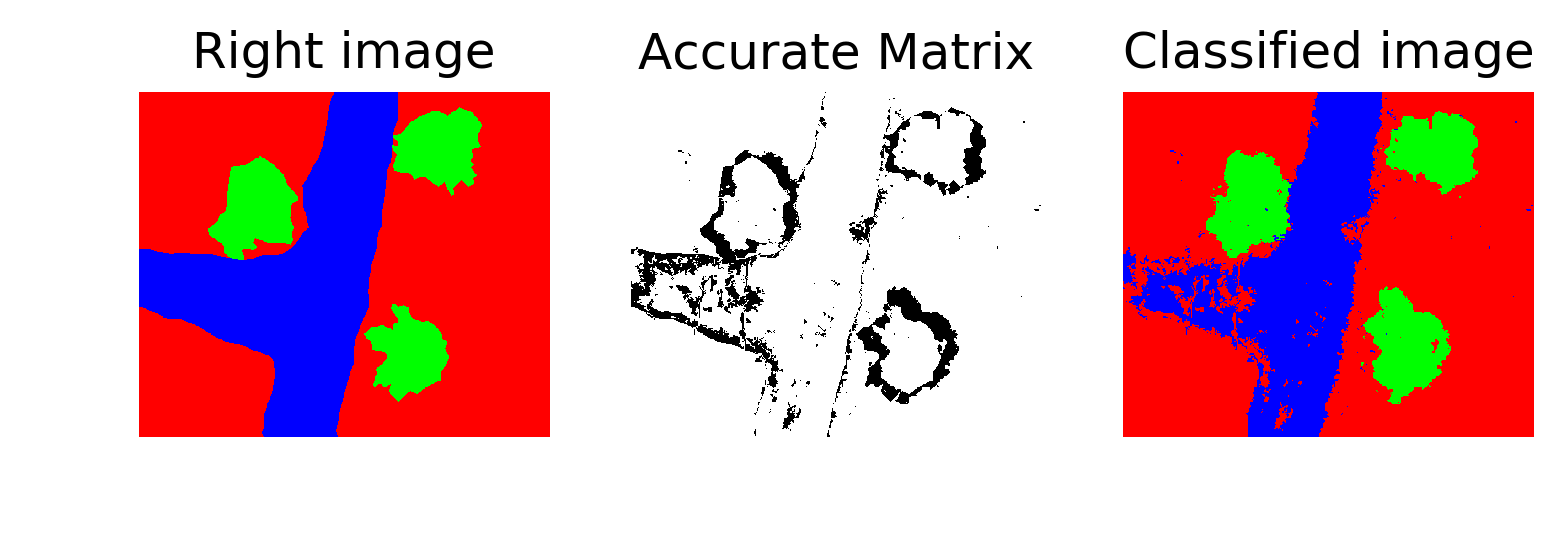

In [3]:
print 'Shape of the rigth image is:',im_right.shape

accurate_matrix = np.equal(np.argmax(im_classif.reshape((-1,3)),1), np.argmax(im_right.reshape((-1, 3)),1))

plt.figure(dpi=300)
plt.subplot(132)
plt.title('Accurate Matrix')
plt.axis('off')
plt.imshow(accurate_matrix.reshape((im_classif.shape[0],im_classif.shape[1])))
plt.gray()

plt.subplot(133)
plt.title('Classified image')
plt.axis('off')
plt.imshow(im_classif)

plt.subplot(131)
plt.title('Right image')
plt.axis('off')
plt.imshow(im_right)

accuracy = accurate_matrix.mean()
print('Accuracy of ' + name_of_classified_image + ' = '+ str(round(accuracy,5)))

In [4]:
from sklearn import metrics

true_label = im_right[:,:,0]/255 + im_right[:,:,1] / 255 * 2 + im_right[:,:,2] / 255 * 3
pred_label = im_classif[:,:,0] / 255 + im_classif[:,:,1] / 255 * 2 + im_classif[:,:,2] / 255 * 3

cm = metrics.confusion_matrix(true_label.flatten(), pred_label.flatten(), labels=[0,1,2,3])
print('Matrix of classification errors:')
print(cm)
print('')

print 'Shape of the image:', pred_label.shape
print('Location of the no-calculated pixels:')
print(np.where( pred_label == 0 ))

Matrix of classification errors:
[[     0      0      0      0]
 [     0 116355   6867   1172]
 [     0   4645  17485     87]
 [     0   8087     52  45330]]

Shape of the image: (410, 488)
Location of the no-calculated pixels:
(array([], dtype=int64), array([], dtype=int64))
